# 导包

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt         # Matplotlib包用于绘图的
plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示汉字
plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号

# 1. 演示DataFrame加载指定行, 列的数据

## 1.1 演示df加载: 列

In [ ]:
# 1. 读取数据源, 获取df对象.
df = pd.read_csv('data/gapminder.tsv', sep='\t')
df.head()

In [ ]:
# 2. 处理数据之前, 先简单的看下数据的结构. 
df.shape  # (1704, 6)
df.dtypes  # 查看df对象, 各列的数据类型
df.info()  # 查看各列的基础信息, (非空)总条数, 数据类型...
df.describe()  # 查看各列的统计信息, 默认只看到 数值列(整数, 小数)的统计信息.
df.describe(include='all')  # 查看所有列的统计信息
df.describe(include=object)  # 查看 字符串列 的统计信息
df.describe(include=['int', 'float'])  # 查看 数值列 的统计信息

In [ ]:
# 3. 加载指定的 1列数据. 
df['country']
df.country

In [ ]:
# 4. 加载指定的多列数据.
df[['country', 'year', 'gdpPercap']]  # 里边的 [] 可以看做是 列名的列表

## 1.2 演示df加载: 行

In [ ]:
# 通过 行索引 获取指定的行.
df.loc[0]  # 根据 行索引 获取数据
df.iloc[0]  # 根据 行号   获取数据

# tail()方式, 获取最后一行
df.tail(n=1)  # n可以省略不写
df.tail(1)

# head()方式, 获取第1行
df.head(1)

## 1.3 演示df加载: 指定行, 列数据(重要)

In [ ]:
# 格式: df.loc[[行], [列]]          行索引 + 列名
# 格式: df.iloc[[行], [列]]         行号 + 列的编号
# 1. loc方式, 获取指定多行数据.
df.loc[[0, 1, 2]]  # 获取 行索引 为0, 1, 2的 数据
# 2. iloc方式, 获取指定多行数据.
df.iloc[[0, 99, 999]]  # 获取 行号 为0, 99, 999的 数据
# 3. 加载指定行的指定列
df.loc[[20, 21, 22], ['country', 'year', 'pop']]  # 行索引 + 列名
df.iloc[[20, 21, 22], [0, 2, 4]]  # 行好 + 列的编号
# 4. 上述的 行, 列部分, 不仅可以传入固定值, 还可以通过 range(), 切片等方式实现. 
df.loc[:, ['country']]  # : 代表所有    所有行, 1列
df.loc[:, ['country', 'continent', 'lifeExp']]  # 所有行, 多列
df.iloc[:, [0]]  # : 代表所有    所有行, 1列
df.iloc[:, [0, 1, 3]]  # 所有行, 多列

df.iloc[:, range(3)]  # 所有行, 前3列
df.iloc[:, range(1, 5, 2)]  # 所有行, 第1, 3列的数据
df.iloc[range(10), range(1, 5, 2)]  # 前10行, 第1, 3列的数据

df.iloc[:, :3]  # 所有行, 前3列
df.iloc[:, 1:5:2]  # 所有行, 第1, 3列的数据

# 2.DataFrame对象-分组聚合

In [ ]:
# 1. 查看源数据
df.head()

In [ ]:
# 分组统计格式: df.groupby('分组字段')['聚合操作的字段'].具体的聚合函数名()
# 分组统计格式: df.groupby(['分组字段1', '分组字段2'])['聚合操作的字段1', '聚合操作的字段2'].具体的聚合函数名()

# 2. 基于上述的格式, 完成如下的需求.
# 需求1: 统计每一年平均预期寿命, 平均人口, 平均GDP
df.groupby('year')  # DataFrameGroupBy  对象
df.groupby('year')['lifeExp']  # SeriesGroupBy  对象
df.groupby('year')['lifeExp'].mean()  # 具体的计算动作

df.groupby('year')['pop'].mean()  # 每年, 平均人口
df.groupby('year')['gdpPercap'].mean()  # 每年, 平均GDP

In [ ]:
# 需求2: 按照大洲计算, 每个各个大洲的平均预期寿命, 平均人口, 平均GDP
df.groupby(['year', 'continent'])[['lifeExp', 'pop', 'gdpPercap']].mean()

# 扩展, 如果计算的是 多字段的 不同的聚合需求, 可以用 agg函数实现.
# 格式: agg({'列名':'聚合函数名', '列名':'聚合函数名'})
df.groupby(['year', 'continent']).agg({'lifeExp': 'mean', 'pop': 'max', 'gdpPercap': 'min'})    # 平均寿命, 最大人口, 最小gdp

In [ ]:
# 需求3: 每个大洲, 列出了多少个国家和地区. 
df.groupby('continent')['country'].value_counts()         # 不能满足我们的要求, 它的结果是: 某个洲, 某个国家, 被统计了多少次
df.groupby('continent')['country'].nunique()              # 这个才是我们要的, 去重统计函数: nunique()

# 3. DataFrame基本绘图

In [ ]:
# 把上述的 每年, 平均寿命 结果绘制成图形.
df.groupby('year')['lifeExp'].mean().plot()             # 默认是1个 折线图.
df.groupby('year')['lifeExp'].mean().plot(figsize=(10, 5))             # 默认是1个 折线图.
# df.groupby('year')['lifeExp'].mean().plot(kind='bar', figsize=(20, 10))   # 直方图(柱状图), figsize=(宽, 高)

# 4. DataFrame对象, 常用的统计值的方法

In [ ]:
# 1. 加载数据源, 获取到df对象
movie = pd.read_csv('data/movie.csv')
movie.head()

In [ ]:
# 2. 演示常用的 统计值的方式.
movie.shape     # 行列数
movie.dtypes    # 每列的数据类型
movie.info()    # 每列的基本信息, 非空值数量, 数据类型...
movie.describe()    # 只统计 数值列 的信息
movie.describe(include=['int', 'float'])    # 只统计 数值列 的信息, 效果同上.

movie.describe(include=object)    # 只统计 字符串列 的信息
movie.describe(include='object')  # 只统计 字符串列 的信息, 效果同上
movie.describe(include='all')     # 统计 所有列 的信息.

# 5. DataFrame对象, 常见的排序方式

In [ ]:
# 1. 查看数据源.
movie.columns       # 查看所有的列
movie.head()        # 查看前5条数据, 看看数据格式

In [ ]:
# 2. 完成如下的需求.
# nlargest(n, '列名')         基于某列, 找出来最大的n个      类似于SQL: order by 列名 desc limit 0, n
# nsmallest(n, '列名')        基于某列, 找出来最小的n个      类似于SQL: order by 列名 asc limit 0, n

# 需求1: 找到小成本, 高口碑的电影.
# Step1: 找到该需求中, 涉及到的列.
movie2 = movie[['movie_title', 'imdb_score', 'budget']]
movie2.head()

# step2: 找到 评分最高的 100部电影.
movie2.nlargest(100, 'imdb_score')

# step3: 基于上一步, 找到 预算最小的 10部电影.
movie2.nlargest(100, 'imdb_score').nsmallest(10, 'budget')

In [ ]:
# 需求2: 找到每年 imdb_score 评分最高的电影.
# 1. 从原始数据中, 找到 要用的几列数据.
movie3 = movie[['movie_title', 'title_year', 'imdb_score']]
movie3.head()

# 2. 按照 年, 评分, 降序排列.
movie3.sort_values(['title_year', 'imdb_score'], ascending=[False, False])  # True: 升序(默认), False(降序)
movie3.sort_values(['title_year', 'imdb_score'], ascending=False)   # 效果同上.

# 3. 基于上述的数据, 只获取每年的 第1条数据即可. 
# 参数解释, subset: 表示子级, 即: 参考某列的值, 进行(去重)删除. 
movie3.sort_values(['title_year', 'imdb_score'], ascending=False).drop_duplicates(subset='title_year')

# 6. 综合小案例-链家数据分析(12个需求)

In [ ]:
# 1. 加载数据源, 获取df对象
df = pd.read_csv('data/LJdata.csv')
df.head()

In [ ]:
# 2. 将上述的列名, 改成英文.
df.columns = ['district', 'address', 'title', 'house_type', 'area', 'price', 'floor', 'build_time', 'direction', 'update_time', 'view_num', 'extra_info', 'link']
df.head()

In [ ]:
# 3. 简单的看看数据集.
df.shape            # 行列数, (2760, 13)
df.info()           # 基本信息
df.describe()       # 统计信息

In [ ]:
# 4. 完成如下的需求. 
# 需求1: 找到租金最低, 租金最高的房子.
# step1: 找到最低租金.
df.sort_values(by='price').head(1)['price']                     # 1300
# step2: 找到最高租金.
df.sort_values(by='price', ascending=False).head(1)['price']    # 210000
# step3: 找到租金最低的房子.
df[df.price == 1300]            # 可以实现需求, 效果不好.
df[df.price == df.price.min()]  # 推荐写法            
# step4: 找到租金最低的房子.
df[df.price == df.price.max()]

In [ ]:
# 需求2: 找到最近新上的10套房源, 更新时间降序排列, 前10个
df.sort_values('update_time', ascending=False).head(10)

In [ ]:
# 需求3: 查看所有更新时间.    细节: 去重
df['update_time'].unique()                # ndarray类型
df.update_time.drop_duplicates()        # Series类型

In [ ]:
# 需求4: 看房人数,    
df.view_num.mean()  # 13.44891304347826, 平均值
df.view_num.max()   # 122
df.view_num.min()   # 0
df.view_num.median()   # 10.0, 中位数. 
df.describe()          # 验证结果

# 进阶版需求: 不同看房人数的房源数量
# SQL写法: select view_num, count(district) as `count` from df group by view_num;
tmp_df = df.groupby('view_num', as_index=False)['district'].count()          # as_index: 表示是否把分组字段充当索引列.
# 修改列名
# tmp_df.columns = ['看房人数', '房源数量']
tmp_df.columns = ['view_num', 'count']
tmp_df.head()

In [ ]:
# 需求5: 把 上述的 count, 即: 不同看房人数的 房源数量, 绘制成图形.
tmp_df[['count']]       # DataFrame对象
tmp_df['count']         # Series对象
tmp_df[['count']].plot(kind='bar', figsize=(20, 10))
# plt.show()            # 如果用的是虚拟机的环境, 或者本地环境. 这句话可以省略不写. 

In [170]:
# 需求6: 房租价格的分布
df['price'].mean()          # 房租: 平均值, 7570.800724637681
df['price'].max()           # 房租: 最大值, 210000 
df['price'].min()           # 房租: 最小值, 1300

1300

In [178]:
# 需求7: 看房人数最多的朝向
tmp_df = df.groupby('direction', as_index=False)['view_num'].sum()
tmp_df[tmp_df.view_num == tmp_df.view_num.max()]

,direction,view_num
23,南 北,11785


<AxesSubplot:xlabel='house_type'>

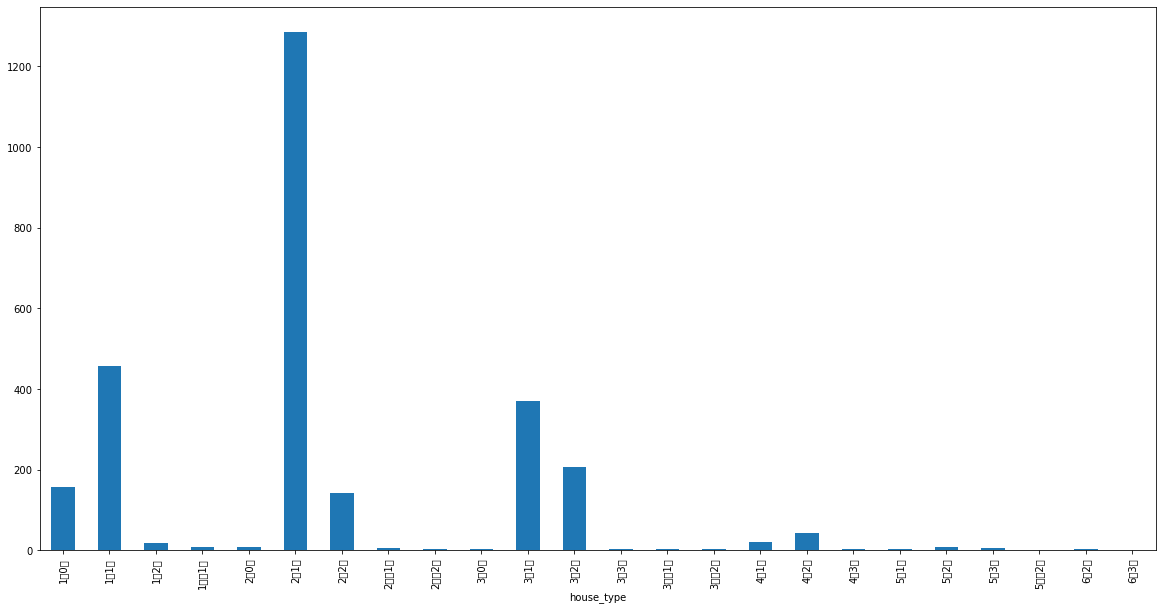

In [245]:
# 需求8: 房型分布情况, 绘图
%matplotlib inline
# df.groupby('house_type', as_index=False)['district'].count()                            # DataFrame对象
df.groupby('house_type')['district'].count().plot(kind='bar', figsize=(20, 10))           # Series对象

In [212]:
# 需求9: 最受欢迎的房型.
tmp_df = df.groupby('house_type', as_index=False)['view_num'].sum()
tmp_df[tmp_df.view_num == tmp_df.view_num.max()]

,house_type,view_num
5,2室1厅,17589


In [218]:
# 需求10: 房子的平均租房价格.
# step1: 给 df对象, 新增一列, 即: 每套房子的平均租金.
df['price_per_m2'] = df['price'] / df['area']
df.head()

# step2: 计算平均租房价格
df.price_per_m2.mean()          # 87.72268429900429

86.36679645198356

In [227]:
# 需求11: 热门小区.   即: 看房人数最多的小区.
df[['address', 'view_num']].groupby('address').view_num.sum()
tmp_df = df[['address', 'view_num']].groupby('address', as_index=False).agg({'view_num': 'sum'})
# tmp_df.sort_values('view_num', ascending=False)
# tmp_df.nlargest(len(tmp_df), 'view_num')
tmp_df.nlargest(10, 'view_num')

,address,view_num
951,清芷园,246
369,卡布其诺,245
938,润枫水尚,217
1149,芍药居北里,194
743,新康园,186
1288,远洋山水,184
15,万国城MOMA,176
342,华贸城,176
1460,龙华园,171
1182,荣丰2008,170


In [235]:
# 需求12: 出租房源最多的小区
# 根据 小区分组, 计算各小区, 出租房源的总数量.
tmp_df = df.groupby('address', as_index=False).district.count()
# 修改列名
tmp_df.columns = ['address', 'count']
# 获取出租房源最多的小区
tmp_df.nlargest(1, 'count')
tmp_df.sort_values('count', ascending=False).head(1)
tmp_df.sort_values('count').tail(1)

,address,count
1288,远洋山水,19
